# MNIST dataset visualisation

Dataset versions, in increasing difficulty:

0. `onehot-bags` (not in PDF file, but self-explanatory)
1. `mnist-bags`
2. `multi-mnist-bags`
3. `mnist-collage`
4. `mnist-patch-collage`

In [1]:
import torch
import itertools

from mil.data.mnist import MNISTBags, OneHotMNISTBags, MNISTCollage, OneHotMNISTCollage, TargetNumbersBagLabelComputer, DistanceBasedTargetNumbersBagLabelComputer
from mil.utils.visualize import plot_bag, print_one_hot_bag, plot_one_hot_collage

/Users/georg/Projects/mil/mil_env/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## 0. `onehot-bags`

This dataset is a simplified version of `mnist-bags` (or `multi-mnist-bags`), where the instances are one-hot encoded 10-dimensional vectors representing the digits as opposed to the actual MNIST pictures.

In [2]:
ds = OneHotMNISTBags(TargetNumbersBagLabelComputer(
                        target_numbers = 0, # target number
                        min_instances_per_target = 1 # 1 instance of a "0" suffices to label a bag as positive
                     ),
                     num_digits = 10, # sample from all 10 MNIST digits
                     min_bag_size = 2, # minimum bag length
                     mean_bag_size = 10, # mean bag length
                     var_bag_size = 2, # variance of bag length
                     num_bags = 250, # number of bags
                     seed = 1,
                     train = True)
loader = torch.utils.data.DataLoader(ds, batch_size = 1, shuffle = True, collate_fn = lambda x: x[0])

for bag in itertools.islice(loader, 10):
    print_one_hot_bag(bag)

-  bag: {2 8 9 1 8 5 5 6 9 7}
-  bag: {9 7 8 2 8 8 2 1 7}
-  bag: {7 8 7 4 6 1 2 3}
-  bag: {4 8 9}
-  bag: {4 5 8 8 9 6 1 1}
+  bag: {4 1 5 8 3 1 0 8}
-  bag: {9 4 4 9 2 3 2 2 2}
+  bag: {0 1 5 6 5 8 8 5 5}
+  bag: {2 8 6 4 9 0 5 5 6 1}
+  bag: {5 1 4 5 2 4 0 8 3}


# 1. `mnist-bags`

In [3]:
ds = MNISTBags(TargetNumbersBagLabelComputer(
                  target_numbers = 0, # target number
                  min_instances_per_target = 1 # 1 instance of a "0" suffices to label a bag as positive
               ),
               num_digits = 10, # sample from all 10 MNIST digits
               min_bag_size = 2, # minimum bag length
               mean_bag_size = 10, # mean bag length
               var_bag_size = 2, # variance of bag length
               num_bags = 250, # number of bags
               seed = 1,
               train = True)
loader = torch.utils.data.DataLoader(ds, batch_size = 1, shuffle = True, collate_fn=lambda x: x[0])
it = iter(loader)

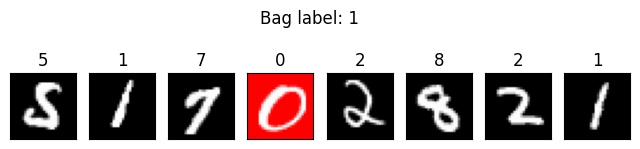

In [4]:
# Visualise a single bag (rerun this cell to see another bag)
plot_bag(next(it))

# 2. `multi-mnist-bags`

This is the same as `mnist-bags` but we set `target_number = (0, 1)` (a tuple instead of just an int).

In [5]:
ds = MNISTBags(TargetNumbersBagLabelComputer(
                    target_numbers = (0, 1), # target number
                    min_instances_per_target = 1 # 1 instance of a "0" suffices to label a bag as positive
               ),
               num_digits = 10, # sample from all 10 MNIST digits
               min_bag_size = 2, # minimum bag length
               mean_bag_size = 10, # mean bag length
               var_bag_size = 2, # variance of bag length
               num_bags = 250, # number of bags
               seed = 1,
               train = True)
loader = torch.utils.data.DataLoader(ds, batch_size = 1, shuffle = True, collate_fn=lambda x: x[0])
it = iter(loader)

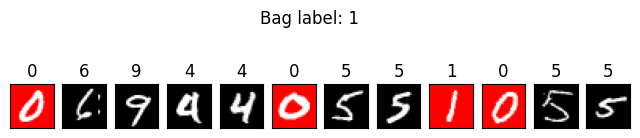

In [6]:
# Visualise a single bag (rerun this cell to see another bag)
plot_bag(next(it))

# 3. `mnist-collage`

This dataset is initialized with using the `MNISTCollage` class which takes similar arguments as `MNISTBags`, except for:
- `min_instances_per_target` is not an argument
- `collage_size` and `min_dist` are new arguments to control collage creation

In [7]:
ds = MNISTCollage(DistanceBasedTargetNumbersBagLabelComputer(
                     target_numbers = (0, 1), # target number
                     dist_predicate=lambda x: x < 50 # if there is a "0" and a "1" closer than 50 pixels, label the bag as positive
                  ),
                  num_digits = 10, # sample from all 10 MNIST digits
                  min_bag_size = 2, # minimum bag length
                  mean_bag_size = 10, # mean bag length
                  var_bag_size = 2, # variance of bag length
                  num_bags = 250, 
                  collage_size=256, # size of the collage
                  min_dist=20, # minimum distance between instances of target numbers to be considered a positive bag
                  seed = 1,
                  train = True)
loader = torch.utils.data.DataLoader(ds, batch_size = 1, shuffle = True, collate_fn=lambda x: x[0])
it = iter(loader)

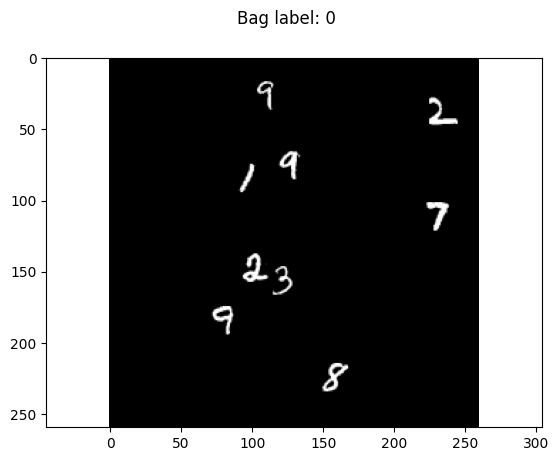

In [8]:
# Visualise a single bag (rerun this cell to see another bag)
plot_bag(next(it))

# 3a. `one-hot-mnist-collage`

One-hot version of `mnist-collage`.

In [9]:
ds = OneHotMNISTCollage(DistanceBasedTargetNumbersBagLabelComputer(
                            target_numbers = (0, 1), # target number
                            dist_predicate=lambda x: x < 50 # if there is a "0" and a "1" closer than 50 pixels, label the bag as positive
                        ),
                        num_digits = 10, # sample from all 10 MNIST digits
                        min_bag_size = 2, # minimum bag length
                        mean_bag_size = 10, # mean bag length
                        var_bag_size = 2, # variance of bag length
                        num_bags = 250, 
                        collage_size=256, # size of the collage
                        min_dist=20, # minimum distance between instances of target numbers to be considered a positive bag
                        seed = 1,
                        train = True)
loader = torch.utils.data.DataLoader(ds, batch_size = 1, shuffle = True, collate_fn=lambda x: x[0])
it = iter(loader)

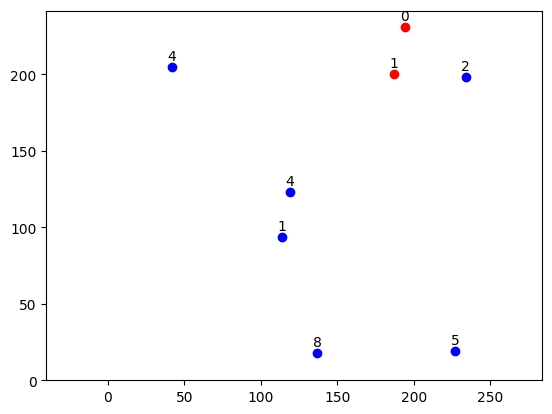

In [13]:
# Visualise a single bag (rerun this cell to see another bag)
plot_one_hot_collage(next(it))